In [1]:

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag , ne_chunk
from nltk.corpus import stopwords 
import nltk

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel("SBM Raw Dump.xlsx")

In [4]:
data.head(1)

Case ID Issue Date      Time Contact Method     Full Name City State  \
0  1284734 2019-02-01  06:07:48  Inbound Email  Mr. Shane NA  NaN   NaN   

  ZIP/Post Code Reason Category        Reason Group  ...  \
0         00000         Request  Literature Request  ...   

      Marketing Segment Product Type Packaging Segment        Brand  \
0  Selective Herbicides  Concentrate            Bottle  BioAdvanced   

                                           Case Text  \
0  From Address: SBM <global_internal_communicati...   

                                             Product  Disposition  \
0  All in One Lawn Weed & Crabgrass Killer 32 oz ...  SDS Request   

         Level 1           Level 2            Level 3  
0  General Issue  Customer Request  Safety Data Sheet  

[1 rows x 26 columns]

In [5]:
data = data[['Case Text','Level 1']]

In [6]:
data.head(1)

Case Text        Level 1
0  From Address: SBM <global_internal_communicati...  General Issue

In [7]:
data.dropna(inplace=True)

In [10]:
data['Level 1'].value_counts()

General Issue    19693
Product Issue     3773
Feedback          2924
Pricing Issue      619
Promotions           2
Name: Level 1, dtype: int64

In [11]:
train_x, text_x , y_train, y_test = train_test_split(data['Case Text'],data['Level 1'])

In [12]:
y_train.unique()

array(['General Issue', 'Product Issue', 'Feedback', 'Pricing Issue',
       'Promotions'], dtype=object)

In [32]:
import matplotlib.pyplot as plt

Index(['Feedback', 'General Issue', 'Pricing Issue', 'Product Issue',
       'Promotions'],
      dtype='object', name='Level 1')
<bound method IndexOpsMixin.tolist of Level 1
Feedback          2924
General Issue    19694
Pricing Issue      619
Product Issue     3773
Promotions           2
Name: Level 1, dtype: int64>


<BarContainer object of 5 artists>

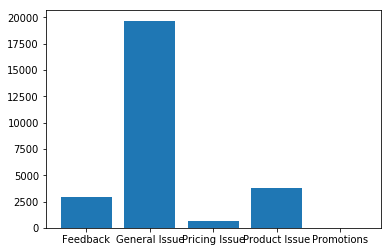

In [41]:
print(x.keys())
print(x.to_list)
plt.bar(x.keys(),x.to_list())

In [42]:

def reg_exp(line):
    line = re.sub(r'[.\w-]+@[\w-]+.com',"",str(line))#email
    line = re.sub(r'http://\S+',"",line)#url
    line = re.sub(r'[\[\])/(,.><]'," ",line)#punctuation
    line = re.sub(r'[\n+\s+]'," ",line)#newline and spaces
    return line

In [31]:
case_data = data["Case Text"]
lines = []
for line in data["Case Text"]:
    line = reg_exp(line)
#     line = re.sub('\w+:')
    lines.append(line)
    
    
    

In [26]:
print(len(lines))
label = data['Level 1']

27012


In [52]:
set(label)

{'Feedback', 'General Issue', 'Pricing Issue', 'Product Issue', 'Promotions'}

In [27]:
from sklearn.pipeline import Pipeline

In [13]:
# words = []
# stop_words = set(stopwords.words('english')) 
# for line in lines:
#     word = word_tokenize(line)
#     filtered_word = []
#     for w in word:
#         if w not in stop_words:
#             filtered_word.append(w)
#     filtered_label = pos_tag(filtered_word)
#     filtered_chunk = ne_chunk(filtered_label)
#     words.append(filtered_chunk)

In [14]:
tfid = TfidfVectorizer(max_df= 0.9,min_df=3,stop_words="english")


In [21]:
features = tfid.fit_transform(lines)

In [22]:
features[0]

<1x7873 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mn = MultinomialNB()

In [44]:
p = Pipeline([('tfid',tfid),('nb',MultinomialNB())])

In [45]:
p.fit(lines,label)

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [48]:
test = "the product is very expensive. not happy with the cost"

In [49]:
p.predict([reg_exp(test)])

array(['General Issue'], dtype='<U13')

In [94]:
from sklearn.svm import LinearSVC

In [95]:
q = Pipeline([('tfid',tfid),('svm',LinearSVC())])

In [96]:
q.fit(lines,label)

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [97]:
q.predict([reg_exp(test)])

array(['General Issue'], dtype=object)